In [1]:
import requests
import pandas as pd
import json

from matplotlib import pyplot as plt
from pandas import json_normalize

In [2]:
url = 'https://justjoin.it/api/offers'

In [3]:
response = requests.get(url)

assert 200 == response.status_code

data = response.json()

In [4]:
len(data)

14925

In [5]:
data[0]

{'title': 'Java Developer in test',
 'street': 'centrum',
 'city': 'Warszawa',
 'country_code': 'PL',
 'address_text': 'centrum, Warszawa',
 'marker_icon': 'java',
 'workplace_type': 'remote',
 'company_name': 'Luxoft Poland',
 'company_url': 'https://career.luxoft.com/locations/poland/',
 'company_size': '1500 ',
 'experience_level': 'mid',
 'latitude': '52.2302091',
 'longitude': '21.0113922',
 'published_at': '2023-02-26T13:00:11.131Z',
 'remote_interview': False,
 'open_to_hire_ukrainians': False,
 'id': 'luxoft-poland-java-developer-in-test',
 'display_offer': True,
 'employment_types': [{'type': 'permanent', 'salary': None}],
 'company_logo_url': 'https://bucket.justjoin.it/offers/company_logos/thumb/8c5c2f629de112201f71fd9cc5c919f8c179d264.png?1676378768',
 'skills': [{'name': 'JMeter', 'level': 3},
  {'name': 'Selenium', 'level': 3},
  {'name': 'Java', 'level': 3}],
 'remote': True,
 'multilocation': [{'city': 'Warszawa',
   'slug': 'luxoft-poland-java-developer-in-test',
   's

In [6]:
data[103]

{'title': 'Webmaster / PHP Developer',
 'street': 'Przyokopowa 33',
 'city': 'Warszawa',
 'country_code': 'PL',
 'address_text': 'Przyokopowa 33, Warszawa',
 'marker_icon': 'php',
 'workplace_type': 'partly_remote',
 'company_name': 'Instytut Monitorowania Mediów S.A.',
 'company_url': 'https://www.imm.com.pl/',
 'company_size': '100+',
 'experience_level': 'mid',
 'latitude': '52.2314807',
 'longitude': '20.9802472',
 'published_at': '2023-02-26T12:00:14.570Z',
 'remote_interview': True,
 'open_to_hire_ukrainians': False,
 'id': 'instytut-monitorowania-mediow-s-a-webmaster-php-developer',
 'display_offer': True,
 'employment_types': [{'type': 'permanent', 'salary': None}],
 'company_logo_url': 'https://bucket.justjoin.it/offers/company_logos/thumb/d12745ac34988749138ca1c654e99b736e96e022.png?1676626098',
 'skills': [{'name': 'CSS', 'level': 3},
  {'name': 'WordPress', 'level': 3},
  {'name': 'HTML', 'level': 3}],
 'remote': False,
 'multilocation': [{'city': 'Warszawa',
   'street': '

In [7]:
df = json_normalize(data)

# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14925 entries, 0 to 14924
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    14925 non-null  object
 1   street                   14925 non-null  object
 2   city                     14925 non-null  object
 3   country_code             14920 non-null  object
 4   address_text             14925 non-null  object
 5   marker_icon              14925 non-null  object
 6   workplace_type           14925 non-null  object
 7   company_name             14925 non-null  object
 8   company_url              14925 non-null  object
 9   company_size             14925 non-null  object
 10  experience_level         14925 non-null  object
 11  latitude                 14925 non-null  object
 12  longitude                14925 non-null  object
 13  published_at             14925 non-null  object
 14  remote_interview         14925 non-nul

<AxesSubplot:>

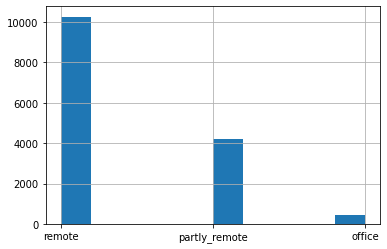

In [9]:
df.workplace_type.hist()

In [10]:
df.title.describe()

count               14925
unique               2412
top       DevOps Engineer
freq                  273
Name: title, dtype: object

In [11]:
df.company_size.describe()

count     14925
unique      377
top        100+
freq        674
Name: company_size, dtype: object

In [12]:
df.company_name.describe()

count     14925
unique     1218
top       WIPRO
freq        342
Name: company_name, dtype: object

#### Remove non-PL jobs


In [13]:
df.country_code.describe()

count     14920
unique       33
top          PL
freq      14620
Name: country_code, dtype: object

In [14]:
df = df[df.country_code == 'PL']

In [15]:
df.shape

(14620, 24)

### Process employment_types

In [16]:
df.employment_types[3715]

[{'type': 'b2b', 'salary': {'from': 10000, 'to': 15000, 'currency': 'pln'}}]

In [17]:
new_df = pd.DataFrame(columns=df.columns)
for i, employment_types in enumerate(df.employment_types):
  for x in employment_types:
    try:
      temp = df[i:i + 1]
      employment_dict = json.loads(str(x).replace('\'', '"'))
      temp.loc[:, ["contract_type", "from", "to", "currency"]] = [employment_dict['type'], employment_dict['salary']['from'], employment_dict['salary']['to'], employment_dict['salary']['currency']]
      new_df = new_df.append(temp)
    except:
      pass
      #print(f'Fail - {x}')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [18]:
new_df.head()

,title,street,city,country_code,address_text,marker_icon,workplace_type,company_name,company_url,company_size,...,employment_types,company_logo_url,skills,remote,multilocation,way_of_apply,contract_type,from,to,currency
1,Project Manager,Al. Jerozolimskie 47/8,Warszawa,PL,"Al. Jerozolimskie 47/8, Warszawa",pm,remote,Panowie Programiści,http://p-programisci.pl,25-30,...,"[{'type': 'b2b', 'salary': {'from': 8000, 'to'...",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Trello', 'level': 3}, {'name': 'Not...",True,"[{'city': 'Kraków', 'slug': 'panowie-programis...",redirect,b2b,8000.0,10000.0,pln
3,Data Scientist,Centrum,Kraków,PL,"Centrum, Kraków",data,remote,ITDS,http://www.itds.pl,200+,...,"[{'type': 'b2b', 'salary': {'from': 16000, 'to...",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Service Designer', 'level': 1}, {'n...",True,"[{'city': 'Kraków', 'street': 'Centrum', 'slug...",form,b2b,16000.0,21000.0,pln
4,Senior Big Data Engineer,50-077,Wrocław,PL,"50-077, Wrocław",data,remote,Maandag® Poland,https://www.maandag.pl/,50+,...,"[{'type': 'b2b', 'salary': {'from': 24000, 'to...",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Java', 'level': 4}, {'name': 'NoSQL...",True,"[{'city': 'Wrocław', 'street': '50-077', 'slug...",redirect,b2b,24000.0,28800.0,pln
4,Senior Big Data Engineer,50-077,Wrocław,PL,"50-077, Wrocław",data,remote,Maandag® Poland,https://www.maandag.pl/,50+,...,"[{'type': 'b2b', 'salary': {'from': 24000, 'to...",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Java', 'level': 4}, {'name': 'NoSQL...",True,"[{'city': 'Wrocław', 'street': '50-077', 'slug...",redirect,permanent,17500.0,20500.0,pln
6,Regular Full Stack Developer,Inflacka,Warszawa,PL,"Inflacka, Warszawa",net,partly_remote,KPMG,http://www.kpmg.pl,2000,...,"[{'type': 'permanent', 'salary': {'from': 9700...",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'SQL', 'level': 3}, {'name': 'C#', '...",False,"[{'city': 'Warszawa', 'slug': 'kpmg-regular-fu...",redirect,permanent,9700.0,18000.0,pln


### Process skills

In [19]:
new_df.skills = [' '.join([skill['name'] for skill in skills]) for skills in new_df.skills]

### Remove non-pln currency

<AxesSubplot:>

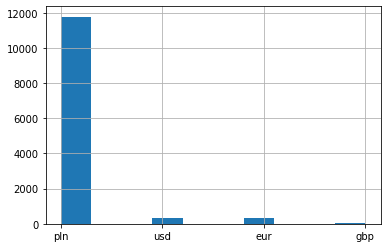

In [20]:
new_df.currency.hist()

In [21]:
new_df = new_df[new_df['currency'] == 'pln']

In [22]:
new_df.shape

(11777, 28)

### Drop columns

In [23]:
new_df.columns

Index(['title', 'street', 'city', 'country_code', 'address_text',
       'marker_icon', 'workplace_type', 'company_name', 'company_url',
       'company_size', 'experience_level', 'latitude', 'longitude',
       'published_at', 'remote_interview', 'open_to_hire_ukrainians', 'id',
       'display_offer', 'employment_types', 'company_logo_url', 'skills',
       'remote', 'multilocation', 'way_of_apply', 'contract_type', 'from',
       'to', 'currency'],
      dtype='object')

In [24]:
drop_columns = [
    'street',
    'address_text',
    'company_url',
    'country_code',
    'latitude',
    'longitude',
    'published_at',
    'employment_types',
    'open_to_hire_ukrainians',
    'id',
    'display_offer',
    'company_logo_url',
    'remote_interview',
    'remote',
    'multilocation',
    'currency',
    'way_of_apply',
    'company_size'
]

In [26]:
new_df.drop(drop_columns, axis=1)

,title,city,marker_icon,workplace_type,company_name,experience_level,skills,contract_type,from,to
1,Project Manager,Warszawa,pm,remote,Panowie Programiści,mid,Trello Notion JIRA,b2b,8000.0,10000.0
3,Data Scientist,Kraków,data,remote,ITDS,mid,Service Designer Data Science Data,b2b,16000.0,21000.0
4,Senior Big Data Engineer,Wrocław,data,remote,Maandag® Poland,senior,Java NoSQL Big Data,b2b,24000.0,28800.0
4,Senior Big Data Engineer,Wrocław,data,remote,Maandag® Poland,senior,Java NoSQL Big Data,permanent,17500.0,20500.0
6,Regular Full Stack Developer,Warszawa,net,partly_remote,KPMG,mid,SQL C# Software Development,permanent,9700.0,18000.0
...,...,...,...,...,...,...,...,...,...,...
14919,Adobe Developer,Wrocław,other,remote,Experis Manpower Group,senior,Adobe Campaign Adobe Target,b2b,26880.0,30240.0
14921,Mid Python Developer,Wrocław,python,remote,sky gate,mid,Django GitFLow Git,b2b,8000.0,16000.0
14922,Mid Flutter Developer,Gdańsk,mobile,partly_remote,sky gate,mid,REST API GitHub Flutter,permanent,9000.0,18000.0
14923,Mid React Developer,Gdańsk,javascript,remote,sky gate,mid,GitHub React JavaScript,permanent,9000.0,18000.0
